# E is for Exploratory Data Analysis - Categorical Data
> What is Exploratory Data Analysis (EDA), why is it done, and how do we do it in Python?

- toc: false 
- badges: True
- comments: true
- categories: [draft]
- hide: True
- image: images/e-is-for-eda-text/alphabet-close-up-communication-conceptual-278887.jpg

## _What is **Exploratory Data Analysis(EDA)**?_
While I know answered these questions in the [last post](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/06/15/e-is-for-eda.html), I also know that [all learning is repetition](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=224340), so I'll do it again :grin:  

EDA is an ethos for how we scrutinize data including, but not limited to: 
- what we for
- the approach we employ
- and the decisions we reach{% fn 1 %}  

## _Why is it done?_
Two main reasons: 

1. If we collected the data ourselves, we need to know if our data suits our needs or if we need to collect more/different data.   

2. If we didn't collect the data ourselves, we need to come to interrogate the data to answer the "5 W's"
- __What__ kind of data do we have (i.e. numeric, categorical)?
- __When__ was the data collected? There could be more recent data which we could collect which would better inform our model.
- __How__ much data do we have? Also, how was the data collected? 
- __Why__ was the data collected? The original motivation could highlight potential areas of bias in the data. 
- __Who__ collected the data? 

Some of those questions can't necessarily be answered by looking at the data alone which is fine because _[nothing comes from nothing](http://parmenides.me/nothing-comes-from-nothing/)_; someone will know the answers all we have to do is know where to look and whom to ask. 

## _How do we do it in Python?_
As always, I'll follow the steps outlined in [_Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow_](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md)

### Step 1: Frame the Problem
"Given a set of features, can we determine how old someone needs to be to read a book?" 

### Step 2: Get the Data
We'll be using the same dataset as in the [previous post](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/06/15/e-is-for-eda.html). 

### Step 3: Explore the Data to Gain Insights (i.e. EDA)
As always, import the essential libraries, then load the data. 

In [1]:
#hide
import warnings; warnings.simplefilter('ignore')

In [2]:
#For data manipulation
import pandas as pd
import numpy as np

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

url = 'https://raw.githubusercontent.com/educatorsRlearners/book-maturity/master/csv/book_info_complete.csv'

df = pd.read_csv(url)

To review,

***How much data do we have?*** 

In [3]:
df.shape

(5816, 24)

- 23 features
- one target
- 5,816 observations

***What type of data do we have?*** 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           5816 non-null   object 
 1   description                     5816 non-null   object 
 2   plot                            5816 non-null   object 
 3   csm_review                      5816 non-null   object 
 4   need_to_know                    5816 non-null   object 
 5   par_rating                      2495 non-null   float64
 6   kids_rating                     3026 non-null   float64
 7   csm_rating                      5816 non-null   int64  
 8   Author                          5468 non-null   object 
 9   Genre                           5816 non-null   object 
 10  Topics                          3868 non-null   object 
 11  Book type                       5816 non-null   object 
 12  Publisher                       56

Looks like mostly categorical with some numeric. 

Lets take a closer look. 

In [5]:
df.head().T

,0,1,2,3,4
title,The Third Twin,Small Damages,"The School for Good and Evil, Book 1","Agent of Chaos: The X-Files Origins, Book 1",Crossing Ebenezer Creek
description,Gripping thriller skimps on character developm...,Luminous story of pregnant teen's summer in Sp...,Fractured fairy tale has plenty of twists for ...,"Series pictures Mulder as teen, captures essen...",Heartbreaking novel follows freed slaves on Sh...
plot,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","It's the summer of 1996, which 18-year-old Ken...",When best friends Sophie and Agatha are stolen...,"Set in 1979, AGENT OF CHAOS follows a 17-year-...",CROSSING EBENEZER CREEK is a YA novel from awa...
csm_review,"THE THIRD TWIN has an interesting, compelling ...",This could well have been a minefield of clich...,The School for Good and Evil is no run-of-the-...,Popular TV characters don't always make a smoo...,"Beautifully written and poetically rendered, t..."
need_to_know,Parents need to know that The Third Twin is a ...,Parents need to know that Small Damages is nar...,Parents need to know that The School for Good ...,Parents need to know that Agent of Chaos: The ...,Parents need to know that Crossing Ebenezer Cr...
par_rating,17,NaN,11,NaN,NaN
kids_rating,14,14,11,NaN,NaN
csm_rating,12,14,8,13,13
Author,CJ Omololu,Beth Kephart,Soman Chainani,Kami Garcia,Tonya Bolden
Genre,Mystery,Coming of Age,Fairy Tale,Science Fiction,Historical Fiction


Again, I collected the data so I know the target is `csm_rating` which is the minimum age Common Sense Media (CSM) says a reader should be for the given book.

Also, we have essentially three types of features:
- Numeric 
    - `par_rating` : Ratings of the book by parents
    - `kids_rating` : Ratings of the book by children  
    - :dart:`csm_rating` : Ratings of the books by Common Sense Media
    - `Number of pages` : Length of the book 
    - `Publisher's recommended age(s)`: Self explanatory
    

- Date
    - `Publication date` : When the book was published
    - `Last updated`: When the book's information was updated on the website

with the rest of the features being text; these features will be our focus for today.  

#### Step 3.1 Housekeeping  
To make inspecting a little easier, lets clean those column names. {% fn 3 %}

In [11]:
df.columns

Index(['title', 'description', 'plot', 'csm_review', 'need_to_know',
       'par_rating', 'kids_rating', 'csm_rating', 'author', 'genre', 'topics',
       'book_type', 'publisher', 'publication_date',
       'publisher's_recommended_ages', 'number_of_pages', 'available_on',
       'last_updated', 'illustrator', 'authors', 'awards', 'publishers',
       'award', 'illustrators'],
      dtype='object')

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [13]:
df.columns

Index(['title', 'description', 'plot', 'csm_review', 'need_to_know',
       'par_rating', 'kids_rating', 'csm_rating', 'author', 'genre', 'topics',
       'book_type', 'publisher', 'publication_date',
       'publisher's_recommended_ages', 'number_of_pages', 'available_on',
       'last_updated', 'illustrator', 'authors', 'awards', 'publishers',
       'award', 'illustrators'],
      dtype='object')

Much better. 

Now lets subset the data frame so we only have the features of interest. 

Given there are twice as many text features compared to non-text features, and the fact that I'm  ~~lazy~~ efficient, I'll create a list of the features I ***don't*** want 

In [14]:
non_text = ['par_rating', 'kids_rating', 'csm_rating', 'number_of_pages', "publisher's_recommended_ages", "publication_date", "last_updated"]

and use it to keep the features I ***do*** want. 

In [15]:
df_text = df.drop(df[non_text], axis=1)

_Voila!_

In [16]:
df_text.head().T

,0,1,2,3,4
title,The Third Twin,Small Damages,"The School for Good and Evil, Book 1","Agent of Chaos: The X-Files Origins, Book 1",Crossing Ebenezer Creek
description,Gripping thriller skimps on character developm...,Luminous story of pregnant teen's summer in Sp...,Fractured fairy tale has plenty of twists for ...,"Series pictures Mulder as teen, captures essen...",Heartbreaking novel follows freed slaves on Sh...
plot,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","It's the summer of 1996, which 18-year-old Ken...",When best friends Sophie and Agatha are stolen...,"Set in 1979, AGENT OF CHAOS follows a 17-year-...",CROSSING EBENEZER CREEK is a YA novel from awa...
csm_review,"THE THIRD TWIN has an interesting, compelling ...",This could well have been a minefield of clich...,The School for Good and Evil is no run-of-the-...,Popular TV characters don't always make a smoo...,"Beautifully written and poetically rendered, t..."
need_to_know,Parents need to know that The Third Twin is a ...,Parents need to know that Small Damages is nar...,Parents need to know that The School for Good ...,Parents need to know that Agent of Chaos: The ...,Parents need to know that Crossing Ebenezer Cr...
author,CJ Omololu,Beth Kephart,Soman Chainani,Kami Garcia,Tonya Bolden
genre,Mystery,Coming of Age,Fairy Tale,Science Fiction,Historical Fiction
topics,"Adventures, Brothers and Sisters, Friendship, ...","Friendship, History, Horses and Farm Animals","Magic and Fantasy, Princesses, Fairies, Mermai...","Magic and Fantasy, Adventures, Great Boy Role ...","Friendship, History"
book_type,Fiction,Fiction,Fiction,Fiction,Fiction
publisher,Delacorte Press,Philomel,HarperCollins Children's Books,Imprint,Bloomsbury Children's Books


So many questions come to mind: 

1. How many missing values do we have?
2. How long are the descriptions? 
3. What's the difference between `csm_review` and `need_to_know`?
4. Similarly, what the difference between `description` and `plot`?
5. How many different authors do we have in the dataset?
6. How many types of books do we have? 

and I'm sure more will arise once we start. 

Where to start? Lets answer the easiest question first :grin:

#### ***How many missing values do we have?***  
A cursory glance at the output above indicates there are potentially a ton of missing values; lets inspect this hunch visually. 

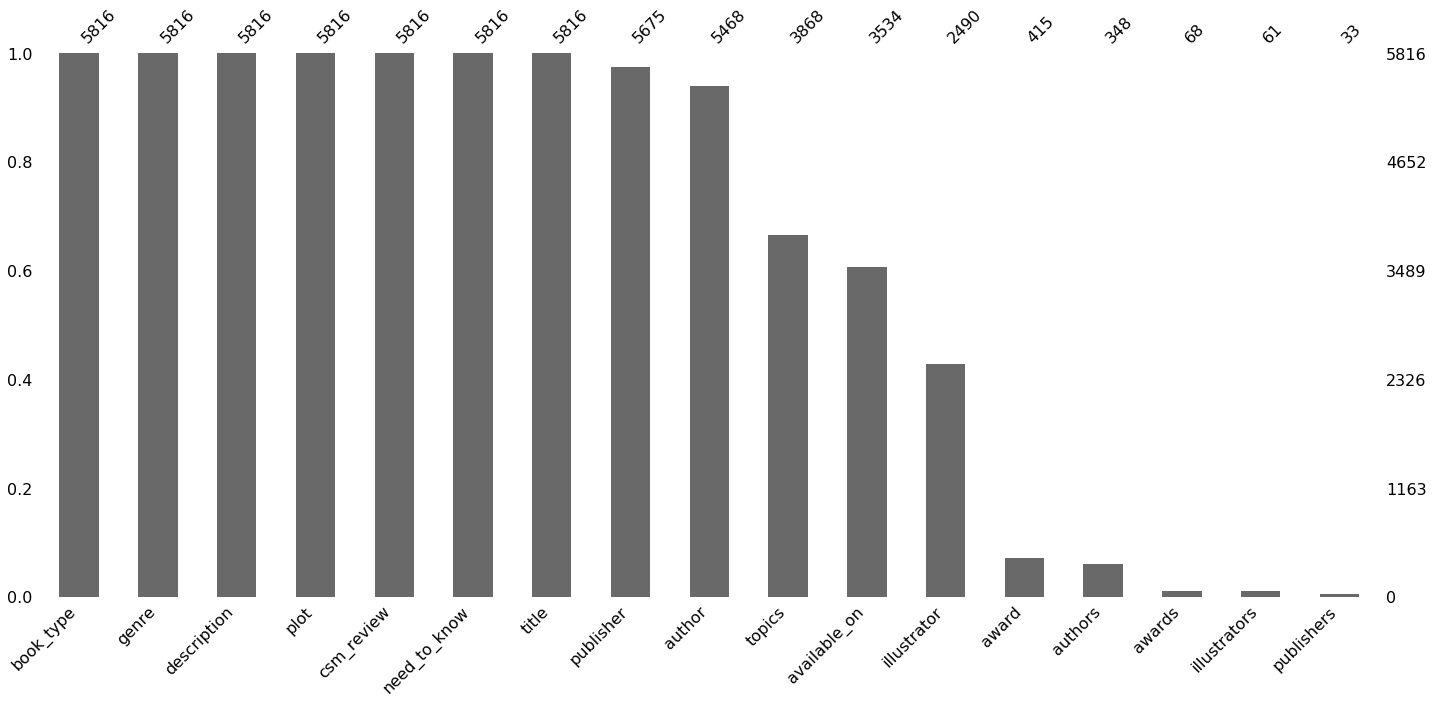

In [17]:
msno.bar(df_text, 
         sort='descending');

Hunch confirmed: 10 the 17 columns are missing values with some being practically empty. 

To get a precise count, we can use `sidetable`.{% fn 2 %} 


In [18]:
import sidetable

df_text.stb.missing(clip_0=True, style=True)

,Missing,Total,Percent
publishers,5783,"5,816",99.43%
illustrators,5755,"5,816",98.95%
awards,5748,"5,816",98.83%
authors,5468,"5,816",94.02%
award,5401,"5,816",92.86%
illustrator,3326,"5,816",57.19%
available_on,2282,"5,816",39.24%
topics,1948,"5,816",33.49%
author,348,"5,816",5.98%
publisher,141,"5,816",2.42%


OK, we have lots of missing values and several columns which appear to be measuring similar features (i.e., authors, illustrators, publishers, awards) so lets inspect these features in pairs.   

### `author` and `authors` 
Every book has an author, even if the author is "[Anonymous](https://bookshop.org/a/9791/9781538718469)," so  then why do we essentially have two columns for the same thing? 

:thinking: `author` is for books with a single writer whereas `authors` is for books with multiple authors like  [_Good Omens_](https://bookshop.org/a/9791/9780060853983).

Let's test that theory. 

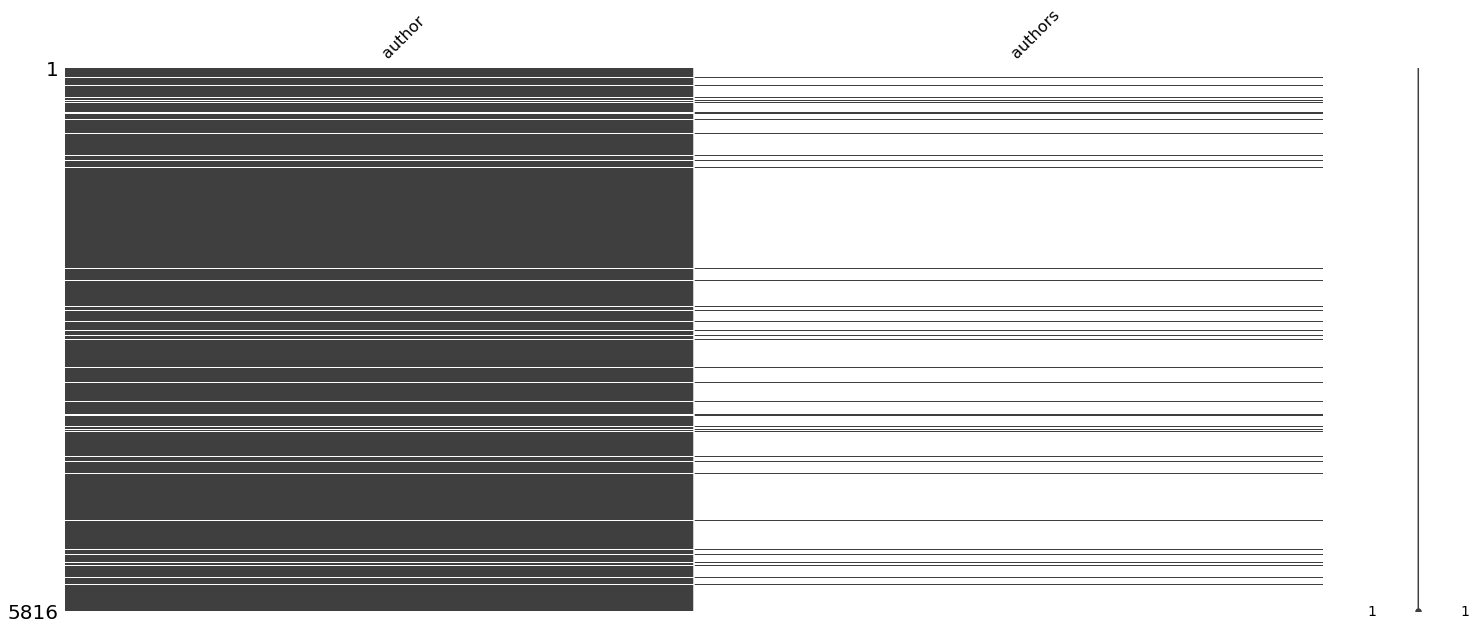

In [19]:
msno.matrix(df_text.loc[:, ['author', 'authors']]);

*Bazinga!* 

We have a perfect correlation between missing data for `author` and `authors` but lets' have a look just in case. 

In [20]:
df_text.loc[df_text['author'].isna() & df_text["authors"].notna(), ['title', 'author', 'authors']].head(10)

,title,author,authors
6,Miss Educated: An Upper Class Novel #2,NaN,"Hobson Brown, Caroline Says, Taylor Materne"
27,"Zeroes, Book 1",NaN,"Scott Westerfeld, Margo Lanagan, Deborah Bianc..."
34,Middle School: From Hero to Zero: Middle Schoo...,NaN,"James Patterson, Chris Tebbetts"
47,Legend: The Graphic Novel,NaN,"Marie Lu, Leigh Dragoon"
108,"Survivors: Stranded, Book 3",NaN,"Jeff Probst, Chris Tebbetts"
112,Avatar: The Last Airbender: The Rise of Kyoshi,NaN,"F.C. Yee, Michael Dante DiMartino"
116,I'm Not Dying With You Tonight,NaN,"Gilly Segal, Kimberly Jones"
129,Upside-Down Magic,NaN,"Sarah Mlynowski, Lauren Myracle, Emily Jenkins"
138,"The Field Guide: The Spiderwick Chronicles, Bo...",NaN,"Holly Black, Tony DiTerlizzi"
164,"We Rise, We Resist, We Raise Our Voices",NaN,"Wade Hudson, Cheryl Willis Hudson"


In [21]:
df_text.loc[df_text['author'].isna() & df_text["authors"].notna(), ['title', 'author', 'authors']].tail(10)

,title,author,authors
5580,Jazzy's Quest: Adopted and Amazing!,NaN,"Carrie Goldman, Juliet Bond"
5635,"A Short Tale About a Long Dog: Here's Hank, Bo...",NaN,"Henry Winkler, Lin Oliver"
5663,"Middle School, the Worst Years of My Life",NaN,"James Patterson, Chris Tebbetts"
5668,Curious George Goes to the Hospital,NaN,"Margret Rey, H. A. Rey"
5701,"Nexus: Zeroes, Book 3",NaN,"Scott Westerfeld, Margo Lanagan, Deborah Bianc..."
5710,Poco Loco,NaN,"J.R. Krause, Maria Chua"
5711,Jacky Ha-Ha: My Life Is a Joke,NaN,"James Patterson, Chris Grabenstein"
5723,Hidden Figures: The True Story of Four Black W...,NaN,"Margot Lee Shetterly, Winifred Conkling"
5756,The Princess in Black and the Science Fair Scare,NaN,"Shannon Hale, Dean Hale"
5812,Secrets of the Terra-Cotta Soldier,NaN,"Ying Chang Compestine, Vinson Compestine"


My curiosity is satiated.

Now the question is how to successfully merge the two columns? 

We could replace the `NaN` in `author` with the:
- values in `authors`
- word `multiple`
- first author in `authors`
- more/most popular of the authors in `authors`

and I'm sure I could come up with even more if I thought about/Googled it but the key is to understand that no matter what we choose, it will have consequences when we build our model{% fn 3 %}. 

Next question which comes to mind is how many different authors are there? 

In [22]:
df_text.loc[:, 'author'].nunique()

2668

Wow! Nearly half our our observations contain a unique name meaning this feature has [high cardinality](https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html).

:thinking: ***Which authors are most represented in the data set?***  

Lets create a [frequency table](https://www.mathsteacher.com.au/year8/ch17_stat/03_freq/freq.htm) to find out. 

In [23]:
author_counts = df_text.loc[:, ["title", 'author']].groupby('author').count().reset_index()
author_counts.sort_values('title', ascending=False).head(10)

,author,title
670,Dr. Seuss,39
2167,Rick Riordan,26
1470,Kevin Henkes,25
1916,Mo Willems,24
1965,Neil Gaiman,18
767,Eoin Colfer,17
2619,Walter Dean Myers,16
2643,William Joyce,16
1103,Jeff Kinney,15
1579,Lemony Snicket,15


Given that I've scraped the data from a website focusing on children, teens, and young adults, the results above only make sense; authors like [Dr. Seuss](https://bookshop.org/contributors/dr-seuss), [Eoin Coifer](https://bookshop.org/contributors/eoin-colfer-20dba4fd-138e-477e-bca5-75b9fa9bfe2f), and [Lemony Snicket](https://bookshop.org/books?keywords=lemony+snicket) are famous children's authors whereas [Rick Riordan](https://bookshop.org/books?keywords=percy+jackson), [Walter Dean Myers](https://bookshop.org/books?keywords=Walter+Dean+Myers) occupy the teen/young adult space and [Neil Gaiman](https://bookshop.org/contributors/neil-gaiman) writes across ages. 

:thnking: ***How many authors are only represented once?*** 

That's easy to check.

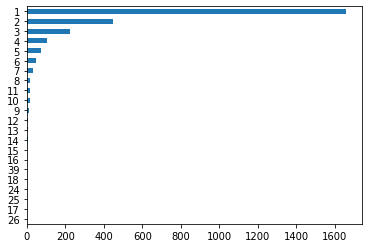

In [24]:
ax = author_counts['title'].value_counts().plot.barh()
ax.invert_yaxis();

Wow! So the overwhelming majority of the authors have one title in our data set.  

Just for fun, lets get an actual percentage. 

In [25]:
round(sum(author_counts['title']==1)/len(author_counts), 2) 

0.62

Just under two-thirds. 

**Why does that matter?**

When it comes time to build our model we'll need to either [label encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), [one-hot encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), or [hash](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html) this feature and whichever we decide to do will end up effecting the model profoundly due to the high [cardinality](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/) of this feature; however, we'll deal with all this another time :grin:. 

### `illustrator` and `illustrators`

Missing values can be quite informative. 

:thinking: What types of books typically have illustrators?  
:bulb: Children's books! 

Therefore, if a book's entries for both `illustrator` and `illustrators` is blank, that *probably* means that book doesn't have illustrations which would mean it is *more likely* to be for older children.

Let's test this theory in the simplest way I can think of :smile: 

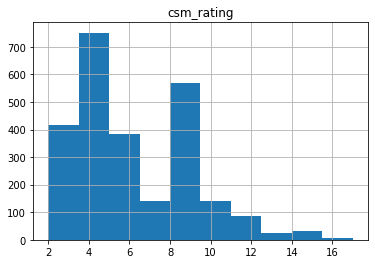

In [60]:
#Has an illustrator
df.loc[df['illustrator'].notna() | df['illustrators'].notna(), ['csm_rating']].hist();

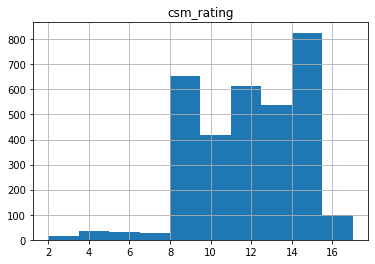

In [61]:
#Doesn't have an illustrator
df.loc[df['illustrators'].isna() & df["illustrator"].isna(), ['csm_rating']].hist();

:bulb: *Who* the illustrator is doesn't matter as much as *whether* there is an illustrator.

Looks like when I do some feature engineering I'll need to create a `has_illustrator` feature. 

## Summary

 - :ballot_box_with_check: numeric data 
 - :ballot_box_with_check: categorical data
 - :black_square_button: images (book covers)

Two down; one to go! 


Going forward, my key points to remember are: 

### Does the shape of the data make sense?  
Based on my problem statement, I do not need normally distributed data. However, based on the question I'm trying to solve, I might expect the data to fit a certain distribution.


### Similarly, are the values what I expect?
What would have happened if the only ratings I had were for 4 year olds? Clearly, I would have made a mistake somewhere along the line and would have to go back and fix it. 

Also, I have to ask if the data makes sense or if I have outliers. 

### What's missing?  
There will always be missing values. How many and in which features is going to drive a lot of feature engineering questions. 

Speaking of which... 

### Are all the features I want present? 
The numeric features I have are pretty complete, but what would happen if I combined the `par_rating` with the `kids_rating` to create a new feature? Would the two features combined be more valuable than either one on its own? Only one way to find out :smile:

Happy coding!

#### Footnotes
{{ 'Adapted from [_Engineering Statistics Handbook_](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)' | fndetail: 1 }}    
{{ 'Be sure to check out Jeff Hale's excellent [post](https://beta.deepnote.com/article/sidetable-pandas-methods-you-didnt-know-you-needed) for more examples on how to use this package' | fndetail: 2 }}  
{{ 'See this post on [Smarter Ways to Encode Categorical Data](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)' | fndetail: 3 }}    
{{ 'Big *Thank You* to [Chaim Gluck](https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd) for providing this tip' | fndetail: 4 }}